```
Base de dados:``` **Spotify**
* https://www.kaggle.com/datasets/alexandrakim2201/spotify-dataset


Colunas:
- **Review**: contém o texto de avaliações de usuários.
- **label**: indica se a avaliação é positiva ou negativa.

### Passos para Gerar a Nuvem de Palavras

1. **Extrair o texto das avaliações**.
2. **Limpar o texto**.
3. **Gerar e exibir a nuvem de palavras**.


In [2]:
import re
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Baixar stopwords em inglês
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vinicius_vieira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
print(stop_words)

{'because', 'ain', 'were', 'hadn', "isn't", 'herself', 'where', 'been', 'very', 'his', 'if', 'a', 'aren', "you'd", 'won', 'before', 'yourselves', 'through', 'how', 'what', 'some', 'doing', 'over', 'didn', 'will', 'hers', 'but', 'above', 'needn', 'o', 'wasn', 'am', 'than', 'i', 'after', "shan't", 'whom', 'them', 'in', 'are', 'of', 'my', 'so', 'into', "don't", 'll', 'hasn', 'ma', 'shan', 'he', 'our', 'they', 'on', 'now', 'the', 'such', 'just', 've', 'why', 'your', "it's", 'that', "mustn't", 'had', 'theirs', 'each', 'wouldn', "should've", 'then', "couldn't", 'do', 're', 'its', 'does', 'which', 'out', 'y', "you've", 'was', 'for', 'doesn', "won't", 'any', 'no', 'mightn', 'there', 'should', 'up', "that'll", 'myself', "hasn't", 'too', "you'll", 'isn', 'm', "wasn't", 'who', 'both', 't', 'not', 'between', 'don', 'mustn', "you're", 'below', 'their', 'same', "hadn't", 'more', 'about', 'and', "she's", 'you', 'be', "doesn't", 'those', "weren't", 'having', 'or', 'until', 'once', 'own', 'themselves',

In [4]:
# Carregando arquivo
import pandas as pd

data = pd.read_csv(r'C:\Users\vinicius_vieira\OneDrive - Sicredi\Residência IA\Introdução à Linguagens\Aulas\data\DATASET-SPOTIFY.csv')

In [5]:
data.head()

,Review,label
0,"Great music service, the audio is high quality...",POSITIVE
1,Please ignore previous negative rating. This a...,POSITIVE
2,"This pop-up ""Get the best Spotify experience o...",NEGATIVE
3,Really buggy and terrible to use as of recently,NEGATIVE
4,Dear Spotify why do I get songs that I didn't ...,NEGATIVE


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52702 entries, 0 to 52701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  52686 non-null  object
 1   label   52702 non-null  object
dtypes: object(2)
memory usage: 823.6+ KB


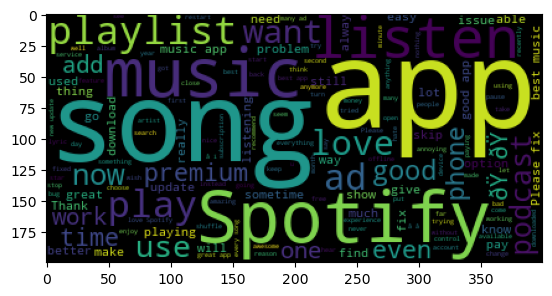

In [6]:
# Teste com todas as palavras
wordcloud = WordCloud().generate(" ".join(data['Review'].astype(str)))
plt.imshow(wordcloud)

In [7]:
#tratamento:
## remoção de urls, www.
## remoção de caracteres especiais
## remoção de números
## transformar todas as palavras em minúsculo
## retiro da minha string as stopwords

In [9]:
texto = ' '.join(data['Review'].astype(str))

In [14]:
# verificar www.
print(re.findall(r'\bwww\.\S+\b', texto))

[]


In [21]:
# verificar caracteres especiais
carac_esp = (re.findall(r'[^a-zA-Z\s]', texto))
len(carac_esp)

291111

In [29]:
def limpa_texto(texto):
    #remoção caracteres especiais
    novo_texto = re.sub(r'[^a-zA-Z\s]','',texto)
    #convertendo tudo para minúsculo
    novo_texto = novo_texto.lower()
    #remover stopwords
    palavras = [palavra for palavra in novo_texto.split() if palavra not in stop_words]
    return ' '.join(palavras)

In [24]:
texto_original = ' '.join(data['Review'].astype(str))
print(len(texto_original))

8028809


In [31]:
texto_formatado = limpa_texto(texto)
print(len(texto_formatado))

5144371


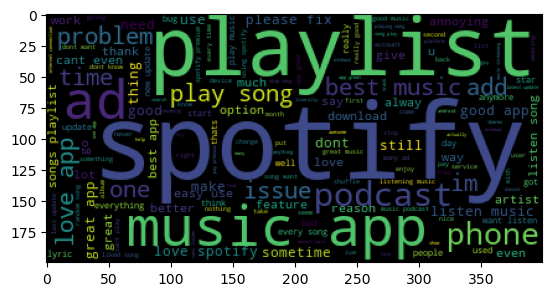

In [33]:
# Teste com as palavras filtradas
texto = limpa_texto(texto)
wordcloud = WordCloud().generate(texto_formatado)
plt.imshow(wordcloud)

In [35]:
data['label'].value_counts()

label
NEGATIVE    29423
POSITIVE    23279
Name: count, dtype: int64

In [40]:
# review negativo
review_negativo = ""
for amostra in data['label'].unique():
    if amostra == 'NEGATIVE':
        filtro_negativo = data.loc[data['label'] == amostra]
        review_negativo = limpa_texto(' '.join(filtro_negativo['Review'].astype(str)))

In [41]:
# review negativo
review_positivo = ""
for amostra in data['label'].unique():
    if amostra == 'POSITIVE':
        filtro_positivo = data.loc[data['label'] == amostra]
        review_positivo = limpa_texto(' '.join(filtro_positivo['Review'].astype(str)))

In [42]:
print(f'Positivos: {len(review_positivo)}')
print(f'Negativos: {len(review_negativo)}')

Positivos: 1523224
Negativos: 3621146


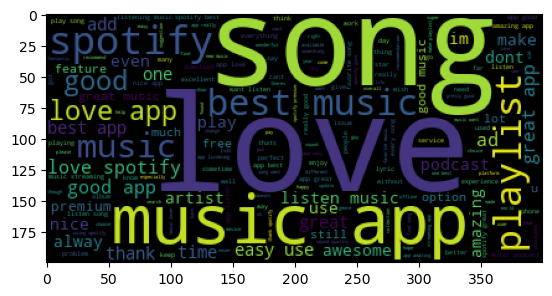

In [43]:
wordcloud = WordCloud().generate(review_positivo)
plt.imshow(wordcloud)

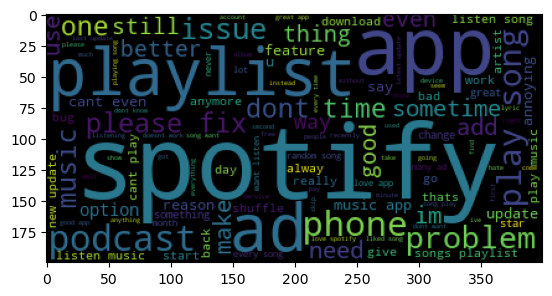

In [44]:
wordcloud = WordCloud().generate(review_negativo)
plt.imshow(wordcloud)